In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst, u_statistics as u_stat
from eod import msg
from utils import u_grid, u_interpolate as u_int
import pickle as pkl
from scipy import stats
import matplotlib as mpl

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
# s40 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-10E_5-8N_-40C_5000km2_1800.p',
#                         'rb'))

# s50 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-10E_5-8N_-50C_5000km2_1800.p',
#                         'rb'))
# s60 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-10E_5-8N_-60C_5000km2_1800.p',
#                         'rb'))
# s70 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-10E_5-8N_-70C_5000km2_1800.p',
#                         'rb'))
# s75 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_count_12W-10E_5-8N_-75C_5000km2_1800.p',
#                         'rb'))

In [3]:
s40 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_area_10W-12E_5-8N_-75C_5000km2_18_1983-1990.p', 'rb'))

s50 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_area_10W-12E_5-8N_-75C_5000km2_18_1990-2000.p','rb'))
s60 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_area_10W-12E_5-8N_-75C_5000km2_18_2000-2010.p','rb'))
s70 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_area_10W-12E_5-8N_-75C_5000km2_18_2010-2017.p','rb'))


In [4]:
for ins in [s40, s50, s60, s70]:
    
    monthf = [item for sublist in ins[10] for item in sublist]
    #print(np.percentile(monthf,80))
    print(len(monthf))

83
237
292
276


1312831.0 2.8758955766826737e-06
135510.0 0.014654209220936317


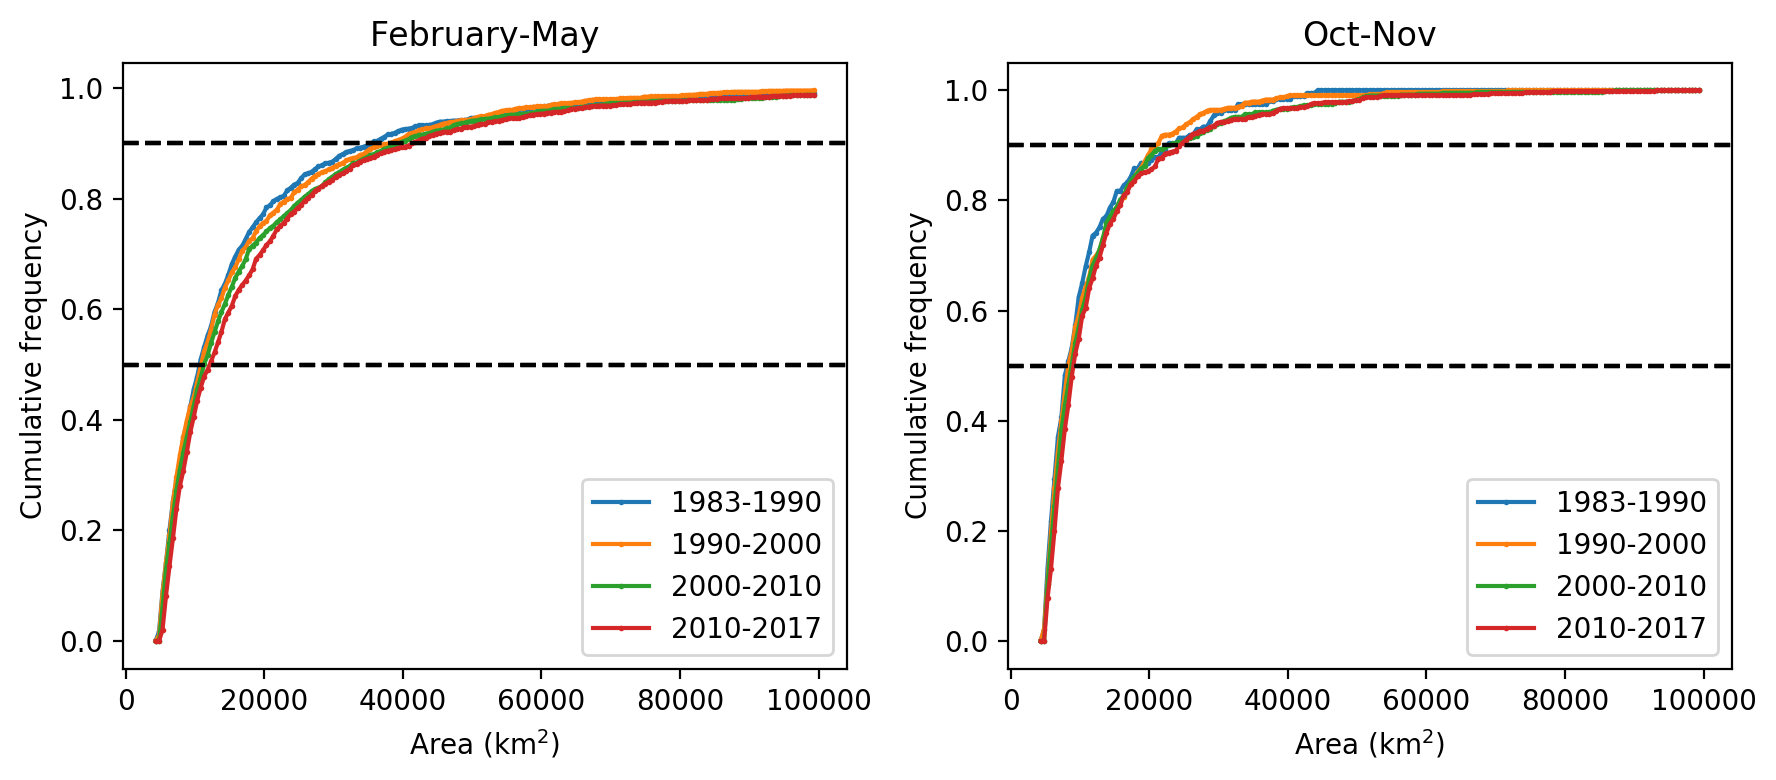

In [7]:
years = np.arange(1983,2018)
x = np.arange(0,len(years))
f = plt.figure(figsize=(9,4), dpi=200)
xx = 1

cmap = mpl.cm.get_cmap('Blues')

rgba = cmap(np.linspace(0.3,1,4))

names = ['1983-1990', '1990-2000', '2000-2010', '2010-2017']
ff = [1,1.01,1.05,1.1]
ffs = [1,1.008,1.02,1.05]
titles=['February-May', 'Oct-Nov']



for ids,m in enumerate([(2,3,4,5), (6,10,11)]):
    
    dlist = []

    ax = f.add_subplot(1,2,ids+1)
    
    for datnb, dat in enumerate([s40,s50, s60, s70]):#, s60]):
        datt=None
        for mm in m:
            month = dat[mm]

            monthf = [item for sublist in month for item in sublist]
            if ids !=0:
                fff=ffs[datnb]
            else:
                fff=ff[datnb]
            datts = np.array(monthf)*64*fff
            
            if datt is None:
                datt = datts
            else:
                try:
                    datt = np.concatenate([datt,datts], axis=0)
                except:
                    ipdb.set_trace()

            #print(mm, datt.size)
        
        #ipdb.set_trace()
        nball, allcount, bins = u_stat.histo_frequency(datt, bins=np.arange(4080, 100000, 500))
        #ipdb.set_trace()
        bin_centre = bins[0:-1] + ((bins[1::] - bins[0:-1]) / 2)
        cumulative = np.cumsum(nball)

        ax.plot(bin_centre,cumulative, label=names[datnb], marker='o', markersize=1)
        #ax.set_ylim(0.6,1)
        plt.axhline(0.5, linestyle='dashed', color='k')
        plt.axhline(0.9, linestyle='dashed', color='k')
        
        if datnb == 1:
            dlist.append(datt)
        if datnb == 3:
            dlist.append(datt)
    
    #ipdb.set_trace()
    
    stat, pval = stats.mannwhitneyu(dlist[0], dlist[1], alternative='two-sided')
    print(stat,pval)
    ax.legend()         
    plt.title(titles[ids])
    
    
    plt.ylabel('Cumulative frequency')
    plt.xlabel('Area (km$^{2}$)')
 
plt.tight_layout()
#plt.savefig('/home/ck/DIR/cornkle/figs/CLOVER/paper1/revision/intense_sig.png')

        

In [80]:
for ids,m in enumerate([(2,3,4), (9,10,11)]):
    
    dlist = {'s1' : [], 's2' : []}

    for datnb, dat in enumerate([s50, s70]):
        
        
        for mm in m:
        
            month = dat[mm]

            monthf = [item for sublist in month for item in sublist]
            datts = np.array(monthf)*64
            try:
                datt = np.concatenate(datts)
            except:
                datt = datts
            if datnb == 0:
                dlist['s1'].extend(datt)
            if datnb == 1:
                dlist['s2'].extend(datt)
            
            
    stat, pval = stats.mannwhitneyu(dlist['s1'], dlist['s2'], alternative='two-sided')
    print(stat,pval)
        

762663.0 0.7299138043699214
100045.5 0.7062473336899715


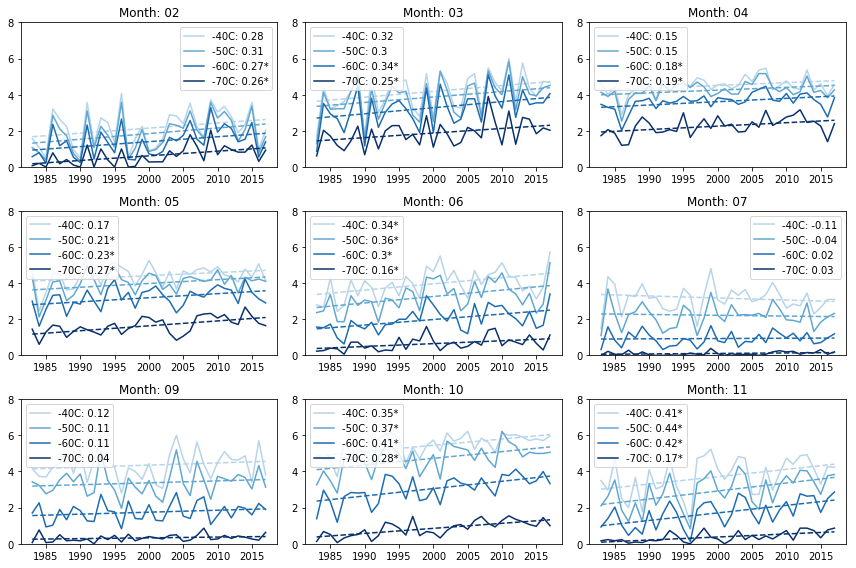

In [7]:
years = np.arange(1983,2018)
x = np.arange(0,len(years))
f = plt.figure(figsize=(12,8))
xx = 1

cmap = mpl.cm.get_cmap('Blues')

rgba = cmap(np.linspace(0.3,1,4))

# 
for ids,m in enumerate([2,3,4,5,6,7,9,10,11]):
    ax = f.add_subplot(3,3,ids+1)
    ax.set_ylim(0,8)
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s40[m][xx::])
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s40[m], color=rgba[0], label='-40C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color=rgba[0])  
    
   
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s50[m][xx::])
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s50[m], color=rgba[1], label='-50C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color=rgba[1])  
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s60[m][xx::])
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s60[m], color=rgba[2], label='-60C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color=rgba[2])  
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s70[m][xx::])      
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s70[m], color=rgba[3], label='-70C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color=rgba[3])
           
#     mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s75[m][xx::]) 
#     if mp <= 0.05:
#         sig = '*'
#     else:
#         sig = ''
#     ax.plot(years, s75[m], 'lightblue', label='-75C: '+str(np.round(mslope*35/np.mean(s75[m])*100,2))+sig)
#     ax.plot(years, mint + x*mslope, '--', color='lightblue')


    ax.legend()         
    plt.title('Month: '+str(m).zfill(2))
    
plt.tight_layout()

In [4]:
years = np.arange(1983,2018)
x = np.arange(0,len(years))

xx = 1

cmap = mpl.cm.get_cmap('Blues')

rgba = cmap(np.linspace(0.3,1,4))

monthly_total40 = []
monthly_slope40 = [] #per decade
sig40 = []

monthly_total50 = []
monthly_slope50 = [] #per decade
sig50 = []

monthly_total60 = []
monthly_slope60 = [] #per decade
sig60 = []

monthly_total70 = []
monthly_slope70 = [] #per decade
sig70 = []


for ids,m in enumerate([1,2,3,4,5,6,7,8,9,10,11,12]):
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s40[m][xx::])
    monthly_total40.append(np.nanmean(s40[m]))
    monthly_slope40.append(mslope)
    sig40.append(mp <= 0.05)
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s50[m][xx::])
    monthly_total50.append(np.nanmean(s50[m]))
    monthly_slope50.append(mslope)
    sig50.append(mp <= 0.05)
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s60[m][xx::])
    monthly_total60.append(np.nanmean(s60[m]))
    monthly_slope60.append(mslope)
    sig60.append(mp <= 0.05)
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s70[m][xx::])
    monthly_total70.append(np.nanmean(s70[m]))
    monthly_slope70.append(mslope)
    sig70.append(mp <= 0.05)

In [5]:
monthly_total40

[0.8368663594470046,
 2.1492258972554543,
 4.127188940092166,
 4.526666666666666,
 4.428571428571429,
 3.9438095238095237,
 3.1225806451612903,
 2.7695852534562206,
 4.354285714285714,
 5.447926267281106,
 3.726666666666666,
 1.1649769585253453]

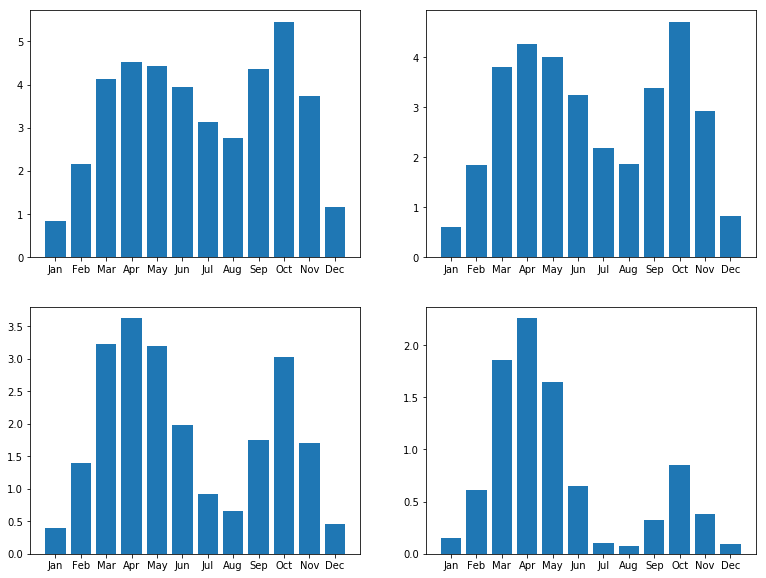

In [8]:
f = plt.figure(figsize=(13,10))

data_list = [[monthly_total40,monthly_slope40,sig40],
             [monthly_total50,monthly_slope50,sig50],
             [monthly_total60,monthly_slope60,sig60],
             [monthly_total70,monthly_slope70,sig70],
            ]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ypos = np.arange(len(months))

for ids, d in enumerate(data_list):
    #ipdb.set_trace()
    ax = f.add_subplot(2, 2, ids+1)
    ax.bar(ypos, d[0], align='center')
    plt.xticks(ypos,months)
    

([<matplotlib.axis.XTick at 0x7f3ff766f550>,
 <a list of 12 Text xticklabel objects>)

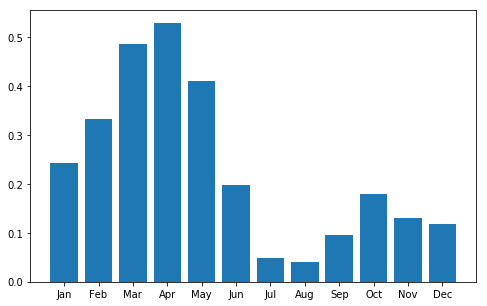

In [7]:
f = plt.figure(figsize=(8,5))

data_list = [[monthly_total40,monthly_slope40,sig40],
             [monthly_total50,monthly_slope50,sig50],
             [monthly_total60,monthly_slope60,sig60],
             [monthly_total70,monthly_slope70,sig70],
            ]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ypos = np.arange(len(months))

ax = f.add_subplot(111)
ax.bar(ypos, np.array(data_list[3][0])/np.array(data_list[1][0]), align='center')
plt.xticks(ypos,months)




['lightcoral' 'lightcoral' 'lightcoral' 'lightcoral' 'lightcoral'
 'darkred' 'lightcoral' 'lightcoral' 'lightcoral' 'darkred' 'darkred'
 'lightcoral']
['darkred' 'darkred' 'darkred' 'darkred' 'darkred' 'darkred' 'lightcoral'
 'lightcoral' 'lightcoral' 'darkred' 'darkred' 'lightcoral']


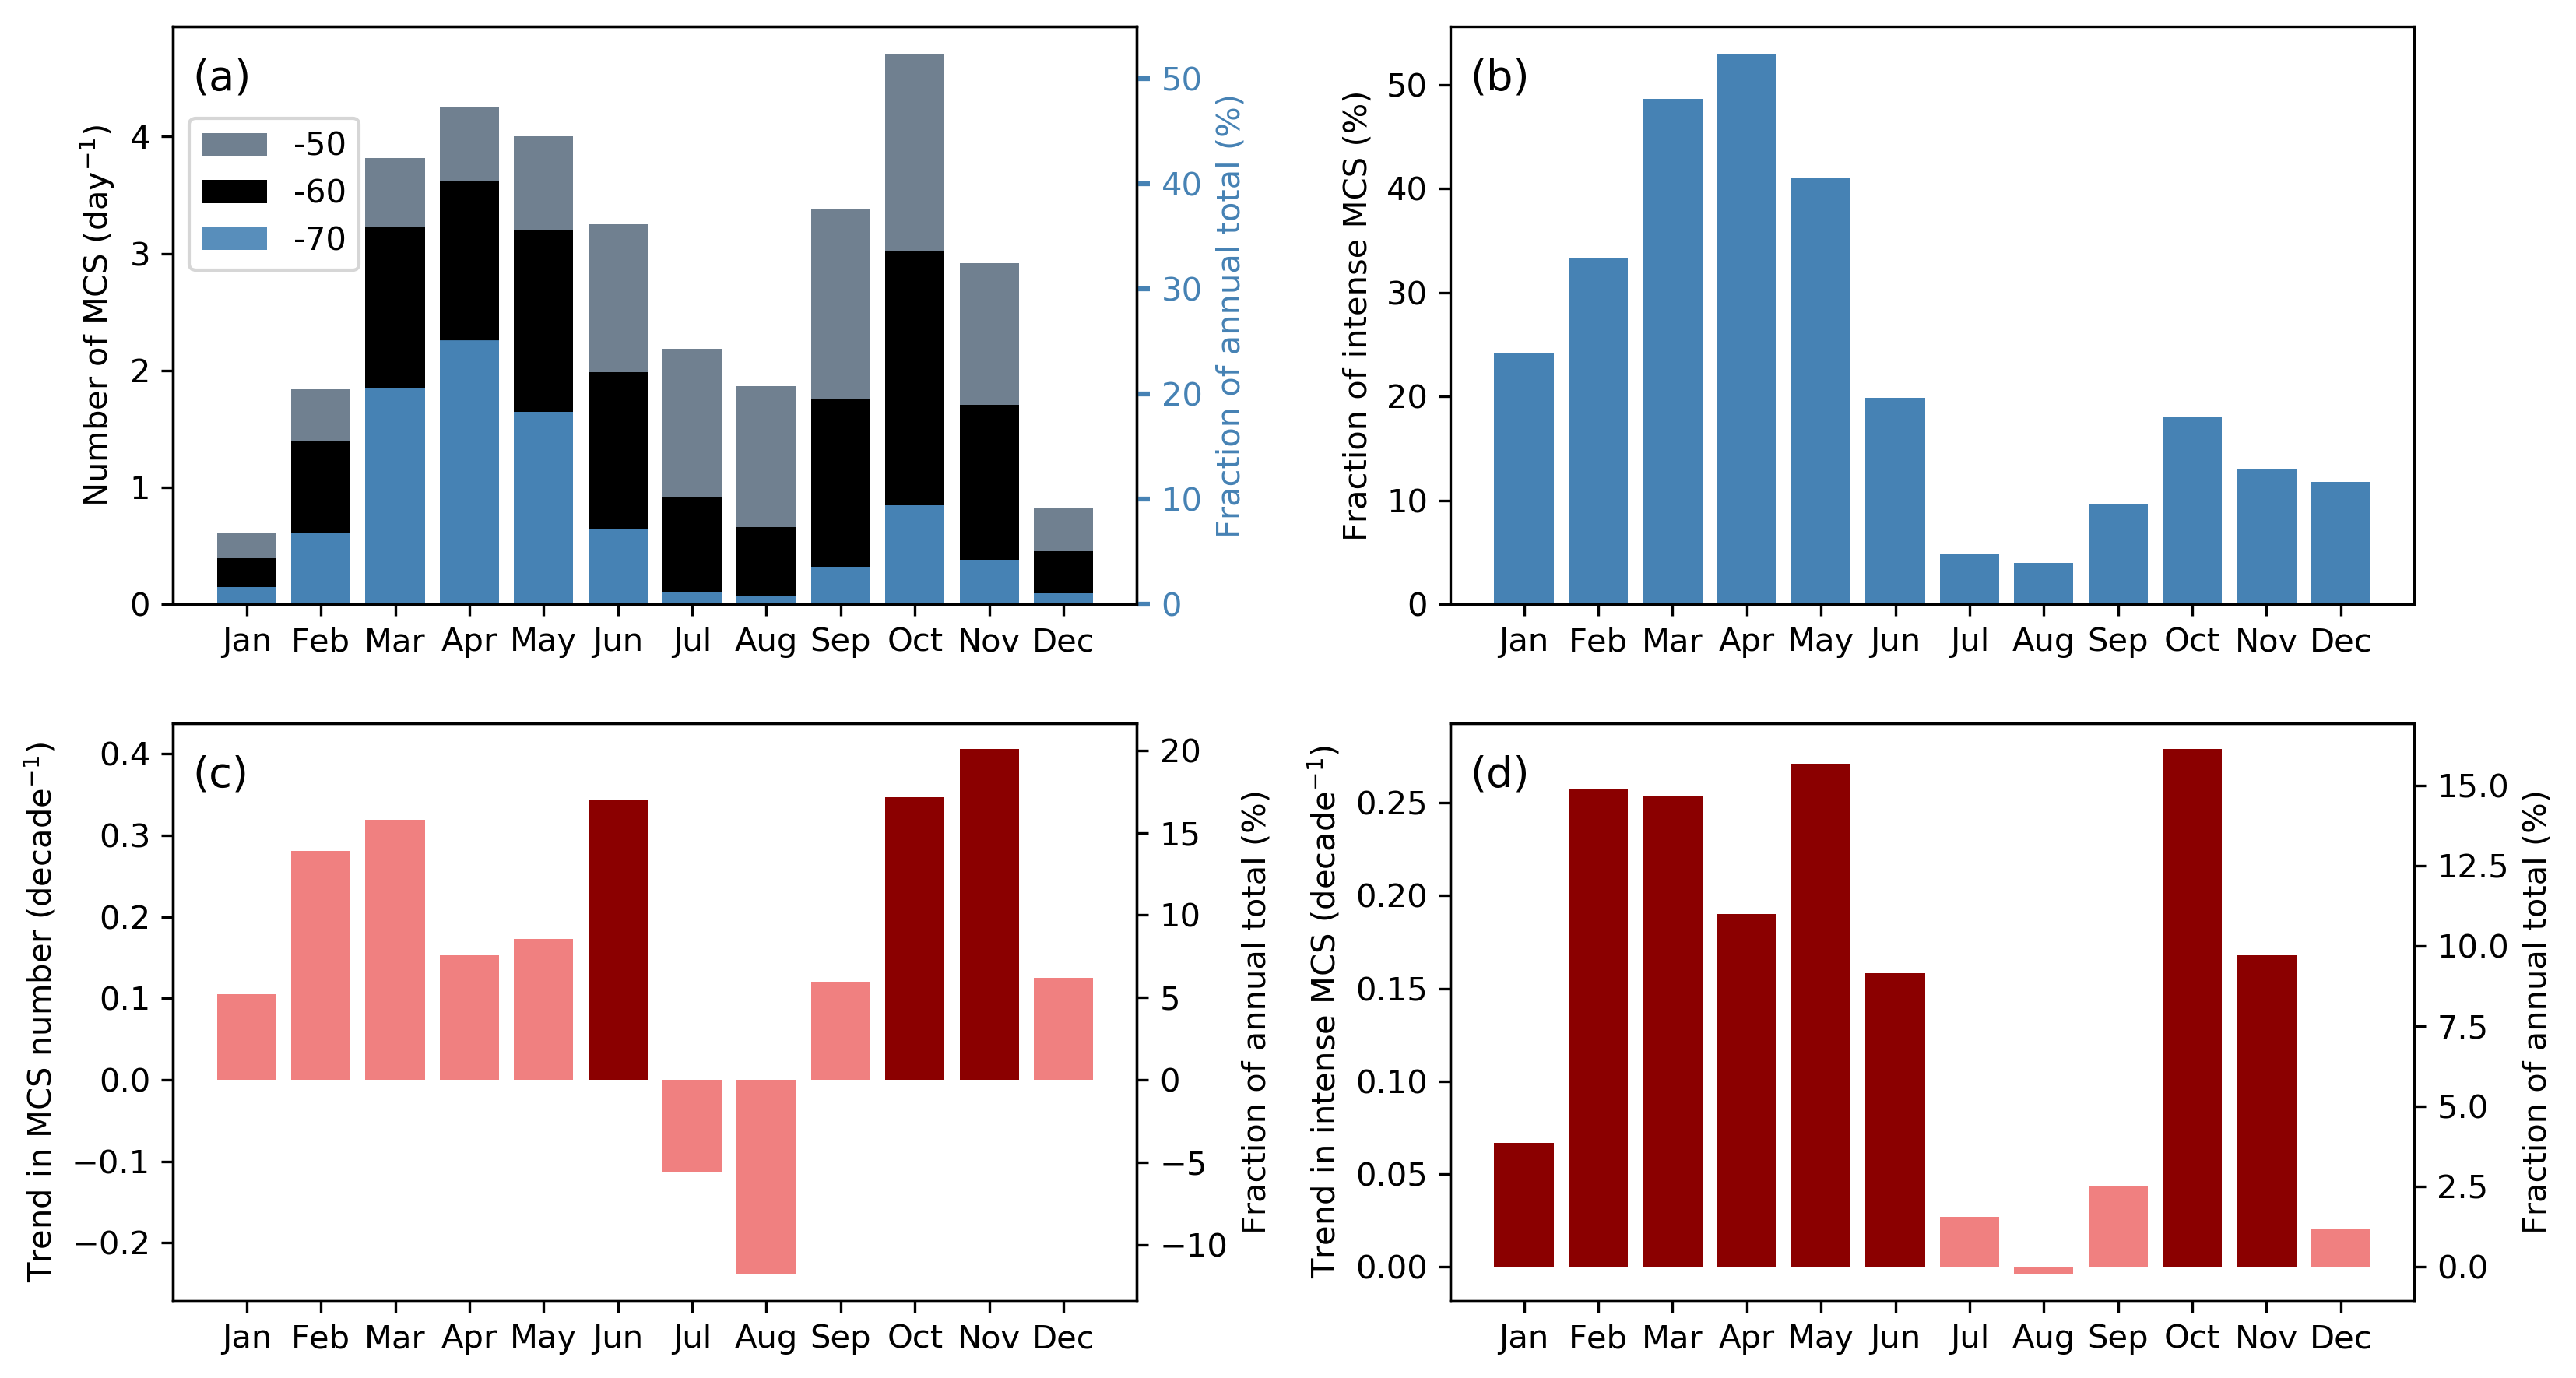

In [8]:
data_list = [[monthly_total40,monthly_slope40,sig40],
             [monthly_total50,monthly_slope50,sig50],
             [monthly_total60,monthly_slope60,sig60],
             [monthly_total70,monthly_slope70,sig70],
            ]

f = plt.figure(figsize=(11,6), dpi=300)
ax = f.add_subplot(2, 2, 1)
#ax.bar(ypos, data_list[0][0], align='center', color='k', label='-40')
ax.bar(ypos, data_list[1][0], align='center', color='slategrey', label=r'-50')
ax.bar(ypos, data_list[2][0], align='center', color='black', label=r'-60')
ax.bar(ypos, data_list[3][0], align='center', color='steelblue', label=r'-70', alpha=0.9)
plt.xticks(ypos,months)
plt.ylabel('Number of MCS (day$^{-1}$)')
plt.text(0.02,0.89, '(a)',  transform=ax.transAxes, fontsize=13)
ax.legend(loc='lower left', bbox_to_anchor=(0,0.55) )
ax1 = ax.twinx()
#ax1.bar(ypos, np.array(data_list[0][0])/np.sum(data_list[0][0])*100, align='center', color='k')
#ax1.bar(ypos, np.array(data_list[1][0])/np.sum(data_list[1][0])*100, align='center', color='steelblue')
#ax1.bar(ypos, np.array(data_list[2][0])/np.sum(data_list[2][0])*100, align='center', color='grey')
ax1.bar(ypos, np.array(data_list[3][0])/np.sum(data_list[3][0])*100, align='center', color='steelblue')

ax1.yaxis.label.set_color('steelblue')
tkw = dict(size=4, width=1.5)
ax1.tick_params(axis='y', colors='steelblue', **tkw)

ax1.set_ylabel(r'Fraction of annual total (%)')
ax1.set_ylim(0,55)

ax = f.add_subplot(222)
ax.bar(ypos, np.array(data_list[3][0])/np.array(data_list[1][0])*100, align='center', color='steelblue')
plt.xticks(ypos,months)
plt.ylabel('Fraction of intense MCS (%)')
plt.text(0.02,0.89, '(b)',  transform=ax.transAxes, fontsize=13)
data_list = [[monthly_total40,monthly_slope40,sig40],
             #[monthly_total50,monthly_slope50,sig50],
             #[monthly_total60,monthly_slope60,sig60],
             [monthly_total70,monthly_slope70,sig70],
            ]


ytext = ['Trend in MCS number (decade$^{-1}$)', 'Trend in intense MCS (decade$^{-1}$)', 'Fraction of annual total (%)', 'Fraction of annual total (%)']
tag = ['(c)', '(d)']
for ids, d in enumerate(data_list):
    #ipdb.set_trace()
    ax = f.add_subplot(2, 2, ids+3)
    ax.bar(ypos, np.array(d[1])*10, align='center')
    plt.text(0.02,0.89, tag[ids],  transform=ax.transAxes, fontsize=13)
    plt.xticks(ypos,months)
    ax1 = ax.twinx()
    color = np.array(['lightcoral']*12)
    color[np.array(d[2])] = 'darkred'

    print(color)
    ax1.bar(ypos, np.array(d[1])/np.sum(d[1])*100, align='center', color=color)
    ax.set_ylabel(ytext[ids])
    ax1.set_ylabel(ytext[ids+2])
    
plt.tight_layout()
#plt.savefig(cnst.network_data + 'figs/CLOVER/paper1/fig_barplot.jpg')

['gray' 'gray' 'gray' 'gray' 'gray' 'k' 'gray' 'gray' 'gray' 'k' 'k'
 'gray']
['gray' 'gray' 'gray' 'gray' 'k' 'k' 'gray' 'gray' 'gray' 'k' 'k' 'gray']
['gray' 'k' 'k' 'k' 'k' 'k' 'gray' 'gray' 'gray' 'k' 'k' 'gray']
['k' 'k' 'k' 'k' 'k' 'k' 'gray' 'gray' 'gray' 'k' 'k' 'gray']


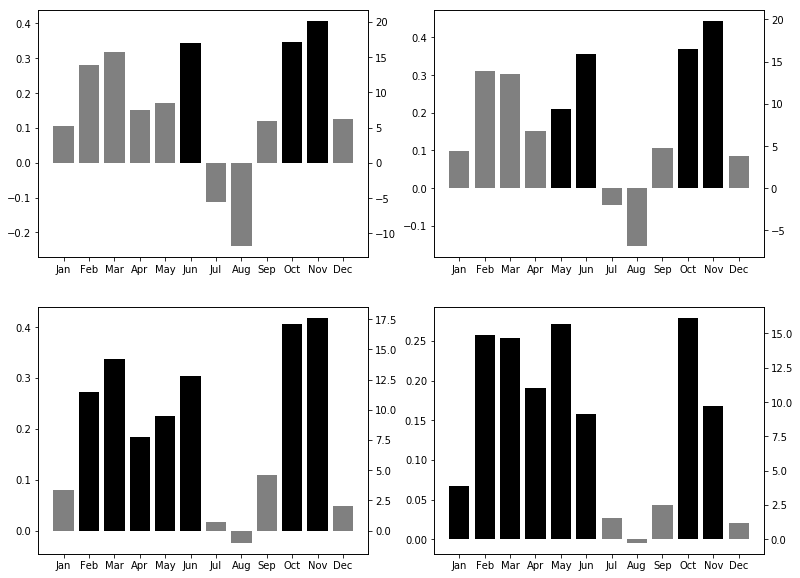

In [158]:
f = plt.figure(figsize=(13,10))

data_list = [[monthly_total40,monthly_slope40,sig40],
             [monthly_total50,monthly_slope50,sig50],
             [monthly_total60,monthly_slope60,sig60],
             [monthly_total70,monthly_slope70,sig70],
            ]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ypos = np.arange(len(months))

for ids, d in enumerate(data_list):
    #ipdb.set_trace()
    ax = f.add_subplot(2, 2, ids+1)
    ax.bar(ypos, np.array(d[1])*10, align='center')
    plt.xticks(ypos,months)
    ax1 = ax.twinx()
    color = np.array(['gray']*12)
    facecolor = np.array(['gray']*12)
    color[d[2]] = 'k'
    facecolor[d[2]] = 'None'
    print(color)
    ax1.bar(ypos, np.array(d[1])/np.sum(d[1])*100, align='center', color=color)
    #ax.plot(ypos, np.array(d[2]), 'o')
    #print(np.sum(d[1]/np.sum(d[1])*100))
    

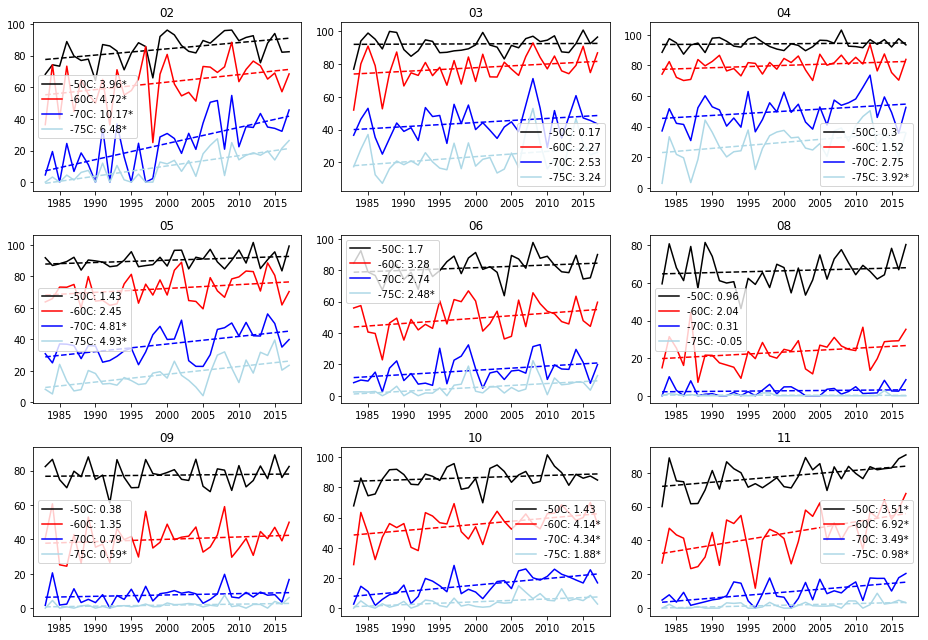

In [88]:
years = np.arange(1983,2018)
x = np.arange(0,len(years))
f = plt.figure(figsize=(13,9))
xx = 1
for ids,m in enumerate([2,3,4,5,6,8,9,10,11]):
    ax = f.add_subplot(3,3,ids+1)
    
    var = (np.array(s50[m]) / np.array(s40[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::])
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'k', label='-50C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='k')  

    var = (np.array(s60[m]) / np.array(s40[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::])
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'r', label='-60C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='r')  
#     if m == 3:
#         mullt = np.linspace(-0.2,+0.2,len(years))
#     else:
#         mullt = 0#np.linspace(-3,+3,len(years))*0
        
    var = ((np.array(s70[m]))/ np.array(s40[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::])      
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'b', label='-70C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='b')
    
    var = ((np.array(s75[m])) / np.array(s40[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::]) 
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'lightblue', label='-75C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='lightblue')
    ax.legend()         
    plt.title(str(m).zfill(2))
    ax.ylim=(0,7.5)
plt.tight_layout()
plt.savefig(cnst.network_data + 'figs/CLOVER/fig3.jpg')

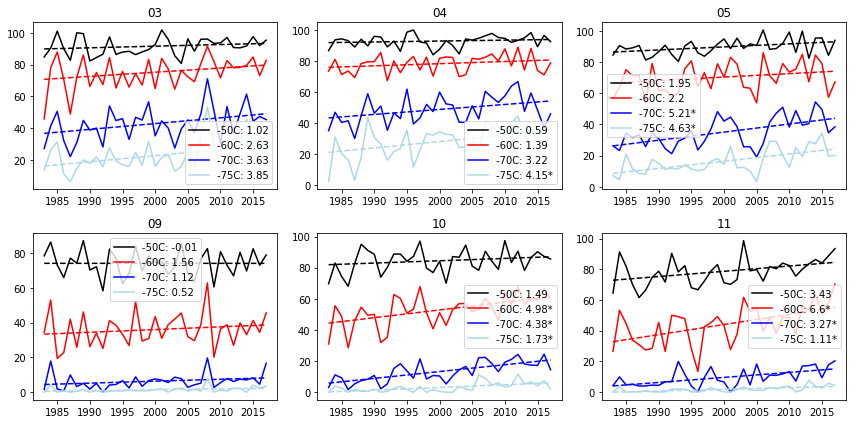

In [12]:
years = np.arange(1983,2018)
x = np.arange(0,len(years))
f = plt.figure(figsize=(12,6))
xx = 1
for ids,m in enumerate([3,4,5,9,10,11]):
    ax = f.add_subplot(2,3,ids+1)
    
    var = (np.array(s50[m]) / np.array(s40[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::])
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'k', label='-50C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='k')  

    var = (np.array(s60[m]) / np.array(s40[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::])
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'r', label='-60C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='r')  
#     if m == 3:
#         mullt = np.linspace(-0.2,+0.2,len(years))
#     else:
#         mullt = 0#np.linspace(-3,+3,len(years))*0
        
    var = ((np.array(s70[m]))/ np.array(s40[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::])      
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'b', label='-70C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='b')
    
    var = ((np.array(s75[m])) / np.array(s40[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::]) 
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'lightblue', label='-75C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='lightblue')
    ax.legend()         
    plt.title(str(m).zfill(2))
    ax.ylim=(0,7.5)
plt.tight_layout()
plt.savefig(cnst.network_data + 'figs/CLOVER/fig3_2.jpg')

In [7]:
np.arange(4,18,2)

array([ 4,  6,  8, 10, 12, 14, 16])

In [14]:
s40 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_90centArea_12W-10E_5-8N_-40C_5000km2_1800.p',
                        'rb'))
s50 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_90centArea_12W-10E_5-8N_-50C_5000km2_1800.p',
                        'rb'))
s60 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_90centArea_12W-10E_5-8N_-60C_5000km2_1800.p',
                        'rb'))
s70 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_90centArea_12W-10E_5-8N_-70C_5000km2_1800.p',
                        'rb'))
s75 =     pkl.load(open(cnst.network_data + 'data/CLOVER/saves/storm_90centArea_12W-10E_5-8N_-75C_5000km2_1800.p',
                        'rb'))

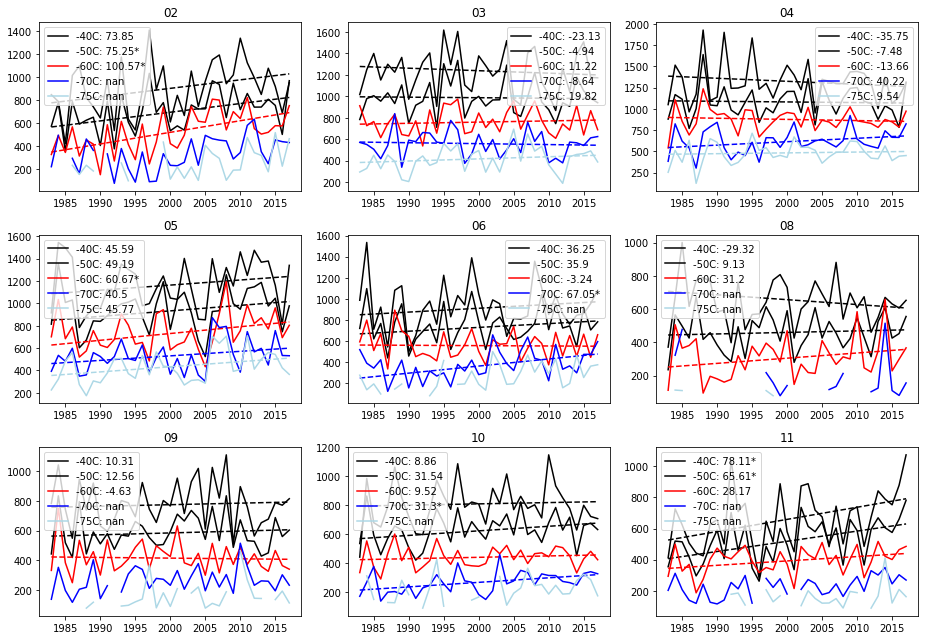

In [15]:
years = np.arange(1983,2018)
x = np.arange(0,len(years))
f = plt.figure(figsize=(13,9))
xx = 2
# 
for ids,m in enumerate([2,3,4,5,6,8,9,10,11]):
    ax = f.add_subplot(3,3,ids+1)
    
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s40[m][xx::])
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s40[m], 'k', label='-40C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='k')  
    
   
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s50[m][xx::])
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s50[m], 'k', label='-50C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='k')  
    
    
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s60[m][xx::])
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s60[m], 'r', label='-60C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='r')  
    
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s70[m][xx::])      
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s70[m], 'b', label='-70C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='b')
            
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], s75[m][xx::]) 
    if mp <= 0.05:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, s75[m], 'lightblue', label='-75C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='lightblue')
    ax.legend()         
    plt.title(str(m).zfill(2))
    ax.ylim=(0,7.5)
plt.tight_layout()

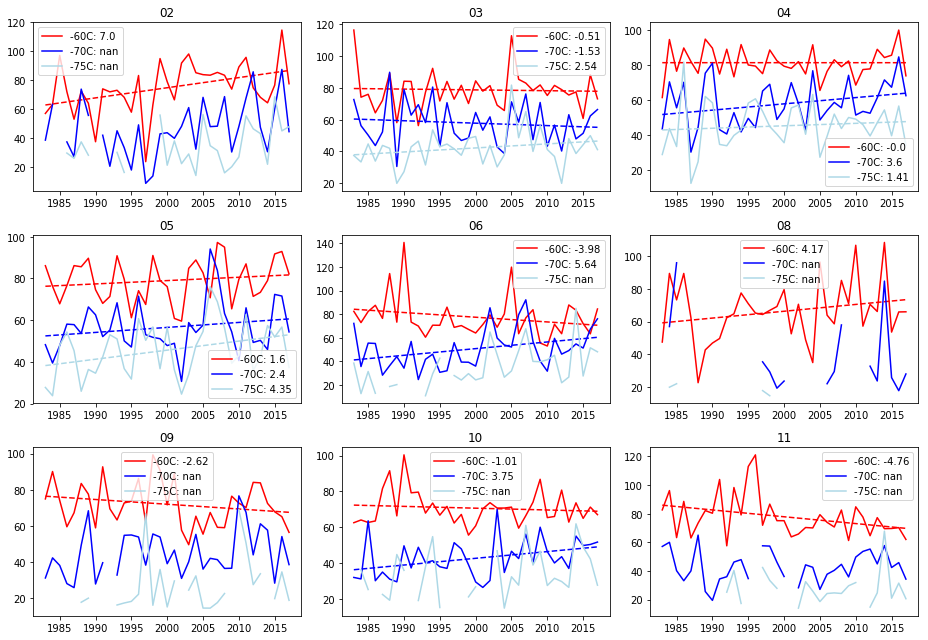

In [16]:
years = np.arange(1983,2018)
x = np.arange(0,len(years))
f = plt.figure(figsize=(13,9))
xx = 0
for ids,m in enumerate([2,3,4,5,6,8,9,10,11]):
    ax = f.add_subplot(3,3,ids+1)
   
    var = (np.array(s60[m]) / np.array(s50[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::])
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'r', label='-60C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='r')  
    
    var = (np.array(s70[m]) / np.array(s50[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::])      
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'b', label='-70C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='b')
    
    var = (np.array(s75[m]) / np.array(s50[m]))*100
    mslope, mint, mrr, mp, mstd_err = stats.linregress(np.arange(len(years))[xx::], var[xx::]) 
    if mp <= 0.01:
        sig = '*'
    else:
        sig = ''
    ax.plot(years, var, 'lightblue', label='-75C: '+str(np.round(mslope*10,2))+sig)
    ax.plot(years, mint + x*mslope, '--', color='lightblue')
    ax.legend()         
    plt.title(str(m).zfill(2))
    ax.ylim=(0,7.5)
plt.tight_layout()